In [2]:
from msedge.selenium_tools import EdgeOptions
from msedge.selenium_tools import Edge

In [3]:
edge_options = EdgeOptions()
edge_options.use_chromiun = True
edge_options.add_argument('--start-maximized')

In [4]:
browser = Edge(executable_path='msedgedriver.exe', options=edge_options)

C:\Users\USER\AppData\Local\Temp/ipykernel_21964/3904951559.py:1: DeprecationWarning: Selenium Tools for Microsoft Edge is deprecated. Please upgrade to Selenium 4 which has built-in support for Microsoft Edge (Chromium): https://docs.microsoft.com/en-us/microsoft-edge/webdriver-chromium/#upgrading-from-selenium-3
  browser = Edge(executable_path='msedgedriver.exe', options=edge_options)


In [5]:
browser.get("https://www.opinet.co.kr/searRgSelect.do")
browser.get("https://www.opinet.co.kr/searRgSelect.do")

In [6]:
gu_list_raw = browser.find_element_by_xpath("""//*[@id="SIGUNGU_NM0"]""")
gu_list = gu_list_raw.find_elements_by_tag_name('option')

In [7]:
gu_names = [option.get_attribute('value') for option in gu_list]
gu_names.remove('')
gu_names

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [8]:
import time
from tqdm import tqdm_notebook

for gu in tqdm_notebook(gu_names):
    element = browser.find_element_by_id("SIGUNGU_NM0")
    element.send_keys(gu)
    
    time.sleep(2)
    
    xpath = """//*[@id="searRgSelect"]"""
    element_sel_gu = browser.find_element_by_xpath(xpath).click()
    
    time.sleep(1)
    
    xpath = """//*[@id="glopopd_excel"]"""
    element_get_excel = browser.find_element_by_xpath(xpath).click()
    
    time.sleep(1)

C:\Users\USER\AppData\Local\Temp/ipykernel_21964/2787006237.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for gu in tqdm_notebook(gu_names):


  0%|          | 0/25 [00:00<?, ?it/s]

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: MicrosoftEdge=99.0.1150.39)


In [ ]:
browser.close()

In [9]:
import pandas as pd
from glob import glob

In [10]:
stations_files = glob('./data/지역_위치별*.xls')   # glob 모조리 읽어주는 함수

tmp_raw = []

for file_name in stations_files:
    tmp = pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp)
    
station_raw = pd.concat(tmp_raw)

In [11]:
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 459 entries, 0 to 36
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      459 non-null    object
 1   상호      459 non-null    object
 2   주소      459 non-null    object
 3   상표      459 non-null    object
 4   전화번호    459 non-null    object
 5   셀프여부    459 non-null    object
 6   고급휘발유   459 non-null    object
 7   휘발유     459 non-null    object
 8   경유      459 non-null    object
 9   실내등유    459 non-null    object
dtypes: object(10)
memory usage: 39.4+ KB


In [12]:
station_raw.tail()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
32,서울특별시,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),GS칼텍스,02-518-5141,N,2598,2398,2164,1699
33,서울특별시,제이제이주유소,서울 강남구 언주로 716,현대오일뱅크,02-518-5631,N,2715,2545,2335,-
34,서울특별시,삼성주유소,서울 강남구 삼성로 521 (삼성동),SK에너지,02-538-0809,N,-,-,-,-
35,서울특별시,경원주유소,서울 강남구 도산대로 428 (청담동),S-OIL,02-517-1957,N,-,-,-,-
36,서울특별시,동우주유소,서울특별시 강남구 봉은사로 311 (논현동),SK에너지,02-542-6726,N,-,-,-,-


In [13]:
stations = pd.DataFrame({'Oil_store':station_raw['상호'], 
                        '주소':station_raw['주소'],
                        '가격':station_raw['휘발유'],
                        '셀프':station_raw['셀프여부'],
                        '상표':station_raw['상표']  })
stations.head()

,Oil_store,주소,가격,셀프,상표
0,(주)퍼스트오일 코알라주유소,서울특별시 강동구 올림픽로 556 (성내동),1918,Y,S-OIL
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1923,N,현대오일뱅크
2,대성석유(주)길동주유소,서울 강동구 천호대로 1168,1935,N,GS칼텍스
3,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),1968,N,GS칼텍스
4,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1982,Y,현대오일뱅크


In [14]:
stations['구'] = [eachAddress.split()[1] for eachAddress in stations['주소']]
stations.tail()

,Oil_store,주소,가격,셀프,상표,구
32,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2398,N,GS칼텍스,강남구
33,제이제이주유소,서울 강남구 언주로 716,2545,N,현대오일뱅크,강남구
34,삼성주유소,서울 강남구 삼성로 521 (삼성동),-,N,SK에너지,강남구
35,경원주유소,서울 강남구 도산대로 428 (청담동),-,N,S-OIL,강남구
36,동우주유소,서울특별시 강남구 봉은사로 311 (논현동),-,N,SK에너지,강남구


In [15]:
stations['구'].unique()

array(['강동구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구',
       '영등포구', '용산구', '강북구', '은평구', '종로구', '중구', '중랑구', '강서구', '관악구',
       '광진구', '구로구', '노원구', '도봉구', '동대문구', '강남구'], dtype=object)

In [16]:
stations[stations['가격'] == '-']

,Oil_store,주소,가격,셀프,상표,구
32,현대오일뱅크㈜직영 사평로주유소,서울 서초구 사평대로 350 (서초동),-,N,현대오일뱅크,서초구
27,지에스칼텍스㈜ 화일주유소,서울 영등포구 도림로 415,-,Y,GS칼텍스,영등포구
16,삼융주유소,서울 은평구 수색로 299 (수색동),-,N,SK에너지,은평구
8,현대오일뱅크㈜직영 재동주유소,서울 종로구 율곡로 58 (경운동),-,N,현대오일뱅크,종로구
9,필동주유소,서울 중구 퇴계로 196 (필동2가),-,N,GS칼텍스,중구
10,지에스칼텍스(주)직영 역전점,서울 중구 퇴계로 15,-,N,GS칼텍스,중구
15,구의스타주유소,서울 광진구 자양로 103,-,N,GS칼텍스,광진구
17,정다운셀프주유소,서울 도봉구 도봉로 635,-,Y,SK에너지,도봉구
34,삼성주유소,서울 강남구 삼성로 521 (삼성동),-,N,SK에너지,강남구
35,경원주유소,서울 강남구 도산대로 428 (청담동),-,N,S-OIL,강남구


#### 가격이 없는 것은 우선 제외하고 생각하자!

In [19]:
stations = stations[stations['가격'] != '-']

In [26]:
stations = stations.astype({'가격':'int'})

In [27]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 448 entries, 0 to 33
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Oil_store  448 non-null    object
 1   주소         448 non-null    object
 2   가격         448 non-null    int32 
 3   셀프         448 non-null    object
 4   상표         448 non-null    object
 5   구          448 non-null    object
dtypes: int32(1), object(5)
memory usage: 22.8+ KB


---

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import platform
plt.rcParams['font.family'] = 'Malgun Gothic'

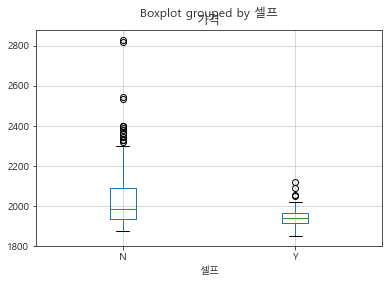

In [54]:
stations.boxplot(column='가격', by='셀프');

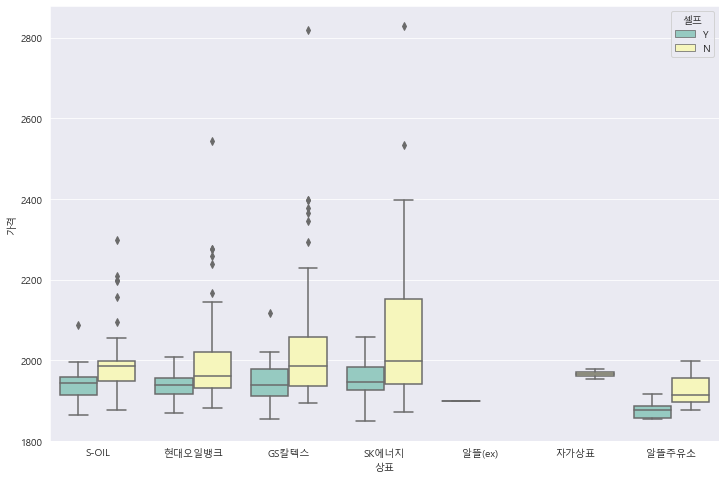

In [62]:
sns.set_style('darkgrid')
plt.figure(figsize=(12, 8))
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.boxplot(x='상표', y='가격', hue='셀프', data=stations, palette='Set3')
plt.show();